In [77]:
from platform import python_version

In [78]:
print(python_version())

3.9.13


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Carregando a base de dados

In [80]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [81]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [82]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [83]:
df.shape

(100000, 9)

# Análise Exploratória

In [84]:
# Verificando o tipo de dado de cada coluna

df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [85]:
# Verificando se há valores ausentes

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Transformando dados de interesse

In [86]:
# Verificando o dicionário de colunas

dict1 = df['smoking_history'].value_counts()
print(dict1)

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [87]:
dict2 = df['gender'].value_counts()
print(dict2)

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


In [88]:
dict3 = df['hypertension'].value_counts()
print(dict3)

0    92515
1     7485
Name: hypertension, dtype: int64


In [89]:
dict4 = df['heart_disease'].value_counts()
print(dict4)

0    96058
1     3942
Name: heart_disease, dtype: int64


In [90]:
dict5 = df['diabetes'].value_counts()
print(dict5)

0    91500
1     8500
Name: diabetes, dtype: int64


In [91]:
# Alterando o dicionário de colunas

df.loc[df['gender'] == 'Male', 'gender'] = 'Masculino'
df.loc[df['gender'] == 'Female', 'gender'] = 'Feminino'
df.loc[df['gender'] == 'Other', 'gender'] = 'Outros'

df.loc[df['hypertension'] == 0, 'hypertension'] = 'Não'
df.loc[df['hypertension'] == 1, 'hypertension'] = 'Sim'

df.loc[df['heart_disease'] == 0, 'heart_disease'] = 'Não'
df.loc[df['heart_disease'] == 1, 'heart_disease'] = 'Sim'

df.loc[df['smoking_history'] == 'No Info', 'smoking_history'] = 'Sem informações'
df.loc[df['smoking_history'] == 'never', 'smoking_history'] = 'Nunca'
df.loc[df['smoking_history'] == 'former', 'smoking_history'] = 'Ex-fumante'
df.loc[df['smoking_history'] == 'current', 'smoking_history'] = 'Fuma pouco'
df.loc[df['smoking_history'] == 'not current', 'smoking_history'] = 'Não fuma atualmente'
df.loc[df['smoking_history'] == 'ever', 'smoking_history'] = 'Fuma regularmente'

df.loc[df['diabetes'] == 0, 'diabetes'] = 'Não'
df.loc[df['diabetes'] == 1, 'diabetes'] = 'Sim'

In [92]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Feminino,80.0,Não,Sim,Nunca,25.19,6.6,140,Não
1,Feminino,54.0,Não,Não,Sem informações,27.32,6.6,80,Não
2,Masculino,28.0,Não,Não,Nunca,27.32,5.7,158,Não
3,Feminino,36.0,Não,Não,Fuma pouco,23.45,5.0,155,Não
4,Masculino,76.0,Sim,Sim,Fuma pouco,20.14,4.8,155,Não


In [93]:
# Inserindo a coluna 'faixa_idade'

df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [94]:
df['faixa_idade'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [95]:
# Inserindo a coluna 'faixa_imc', a partir da classificação feita pela Organização Mundial de Saúde (OMS)

df['bmi'].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [96]:
df['faixa_imc'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=['Baixo peso', 'Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Mórbida 1', 'Obesidade Mórbida 2'])

In [97]:
# Inserindo a coluna 'faixa_glicemia', a partir da classificação da OMS

df['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

In [98]:
df['faixa_glicemia'] = pd.cut(df['blood_glucose_level'], bins=[0, 70, 110, 126, 400], labels=['Hipoglicemia', 'Normal', 'Pré-diabetes', 'Possível diabetes'])

In [99]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,faixa_idade,faixa_imc,faixa_glicemia
0,Feminino,80.0,Não,Sim,Nunca,25.19,6.6,140,Não,71-80,Sobrepeso,Possível diabetes
1,Feminino,54.0,Não,Não,Sem informações,27.32,6.6,80,Não,51-60,Sobrepeso,Normal
2,Masculino,28.0,Não,Não,Nunca,27.32,5.7,158,Não,21-30,Sobrepeso,Possível diabetes
3,Feminino,36.0,Não,Não,Fuma pouco,23.45,5.0,155,Não,31-40,Normal,Possível diabetes
4,Masculino,76.0,Sim,Sim,Fuma pouco,20.14,4.8,155,Não,71-80,Normal,Possível diabetes


In [100]:
# Alterando títulos das colunas
''
df.columns = ['genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'historico_fumante', 'imc', 'nivel_hba1c', 'nivel_glicose_sangue', 'diabetico', 'faixa_idade', 'faixa_glicemia', 'faixa_imc']

In [101]:
df.head()

,genero,idade,hipertensao,doenca_cardiaca,historico_fumante,imc,nivel_hba1c,nivel_glicose_sangue,diabetico,faixa_idade,faixa_glicemia,faixa_imc
0,Feminino,80.0,Não,Sim,Nunca,25.19,6.6,140,Não,71-80,Sobrepeso,Possível diabetes
1,Feminino,54.0,Não,Não,Sem informações,27.32,6.6,80,Não,51-60,Sobrepeso,Normal
2,Masculino,28.0,Não,Não,Nunca,27.32,5.7,158,Não,21-30,Sobrepeso,Possível diabetes
3,Feminino,36.0,Não,Não,Fuma pouco,23.45,5.0,155,Não,31-40,Normal,Possível diabetes
4,Masculino,76.0,Sim,Sim,Fuma pouco,20.14,4.8,155,Não,71-80,Normal,Possível diabetes


In [102]:
# Alterando ordem das colunas

df = df.reindex(columns=['genero', 'idade', 'faixa_idade', 'hipertensao', 'doenca_cardiaca', 'historico_fumante', 'imc', 'faixa_imc', 'nivel_hba1c', 'nivel_glicose_sangue', 'faixa_glicemia', 'diabetico'])

In [103]:
df.head()

,genero,idade,faixa_idade,hipertensao,doenca_cardiaca,historico_fumante,imc,faixa_imc,nivel_hba1c,nivel_glicose_sangue,faixa_glicemia,diabetico
0,Feminino,80.0,71-80,Não,Sim,Nunca,25.19,Possível diabetes,6.6,140,Sobrepeso,Não
1,Feminino,54.0,51-60,Não,Não,Sem informações,27.32,Normal,6.6,80,Sobrepeso,Não
2,Masculino,28.0,21-30,Não,Não,Nunca,27.32,Possível diabetes,5.7,158,Sobrepeso,Não
3,Feminino,36.0,31-40,Não,Não,Fuma pouco,23.45,Possível diabetes,5.0,155,Normal,Não
4,Masculino,76.0,71-80,Sim,Sim,Fuma pouco,20.14,Possível diabetes,4.8,155,Normal,Não


In [104]:
# Verificando o tipo de cada coluna

df.dtypes

genero                    object
idade                    float64
faixa_idade             category
hipertensao               object
doenca_cardiaca           object
historico_fumante         object
imc                      float64
faixa_imc               category
nivel_hba1c              float64
nivel_glicose_sangue       int64
faixa_glicemia          category
diabetico                 object
dtype: object

# 

# Gráfico de ocorrências de pessoas diabéticas por faixa de idade

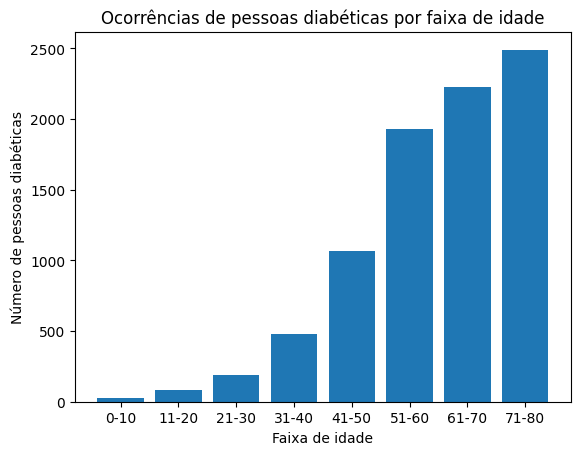

In [105]:
# Definindo a seleção de dados
df_diabetico_idade = df[df['diabetico'] == 'Sim'].groupby('faixa_idade').size().reset_index(name='count')

# Criando o gráfico de barras
plt.bar(df_diabetico_idade['faixa_idade'], df_diabetico_idade['count'])

# Definindo títulos
plt.xlabel('Faixa de idade')
plt.ylabel('Número de pessoas diabéticas')
plt.title('Ocorrências de pessoas diabéticas por faixa de idade')

# Exibindo o gráfico
plt.show()

# 

# Filtrando o dataframe pelas pessoas diabéticas

In [69]:
df_diabetico = df.loc[df['diabetico'] == 'Sim']

In [70]:
df_diabetico.head()

,genero,idade,faixa_idade,hipertensao,doenca_cardiaca,historico_fumante,imc,faixa_imc,nivel_hba1c,nivel_glicose_sangue,faixa_glicemia,diabetico
6,Feminino,44.0,41-50,Não,Não,Nunca,19.31,Normal,6.5,200,Possível diabetes,Sim
26,Masculino,67.0,61-70,Não,Sim,Não fuma atualmente,27.32,Sobrepeso,6.5,200,Possível diabetes,Sim
38,Masculino,50.0,41-50,Sim,Não,Fuma pouco,27.32,Sobrepeso,5.7,260,Possível diabetes,Sim
40,Masculino,73.0,71-80,Não,Não,Ex-fumante,25.91,Sobrepeso,9.0,160,Possível diabetes,Sim
53,Feminino,53.0,51-60,Não,Não,Ex-fumante,27.32,Sobrepeso,7.0,159,Possível diabetes,Sim


In [71]:
df_diabetico.shape

(8500, 12)

Gráfico da distribuição das categorias de histórico de fumantes, entre pessoas diabéticas:

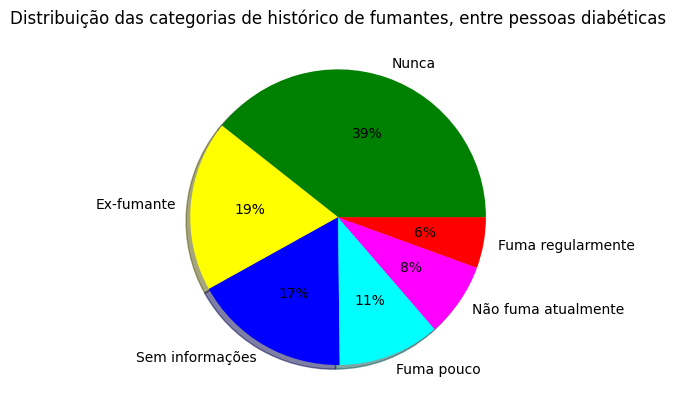

In [72]:
# Definindo a seleção de dados
contagem_diabeticos_fumantes = df_diabetico['historico_fumante'].value_counts()

# Definindo as cores do gráfico
cores_diabeticos_fumantes = {'Nunca': 'green', 'Ex-fumante': 'yellow', 'Fuma regularmente': 'red', 'Não fuma atualmente': 'magenta', 'Fuma pouco': 'cyan', 'Sem informações': 'blue'}

# Criando o gráfico
plt.pie(contagem_diabeticos_fumantes.values, labels=contagem_diabeticos_fumantes.index, colors=[cores_diabeticos_fumantes[x] for x in contagem_diabeticos_fumantes.index], autopct='%1.f%%', shadow = True)

# Definindo título do gráfico
plt.title('Distribuição das categorias de histórico de fumantes, entre pessoas diabéticas')

# Exibindo o gráfico
plt.show()

Gráfico de diagnóstico de hipertensão entre pessoas diabéticas:

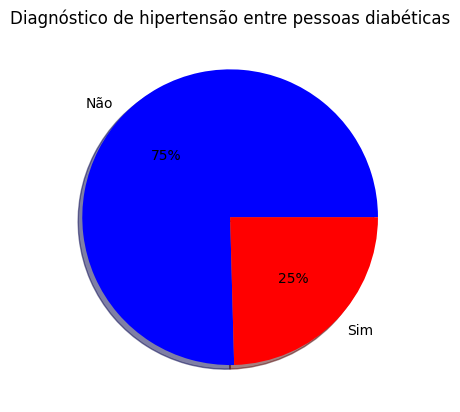

In [73]:
# Definindo a seleção de dados
contagem_diabeticos_hipertensao = df_diabetico['hipertensao'].value_counts()

# Definindo as cores do gráfico
cores_diabeticos_hipertensao = {'Sim': 'red', 'Não': 'blue'}

# Criando o gráfico
plt.pie(contagem_diabeticos_hipertensao.values, labels=contagem_diabeticos_hipertensao.index, colors=[cores_diabeticos_hipertensao[x] for x in contagem_diabeticos_hipertensao.index], autopct='%1.f%%', shadow= True)

# Definindo título do gráfico
plt.title('Diagnóstico de hipertensão entre pessoas diabéticas')

# Exibindo o gráfico
plt.show()

Gráfico de distribuição de pessoas diabéticas em diferentes categorias de IMC (classificação da OMS):

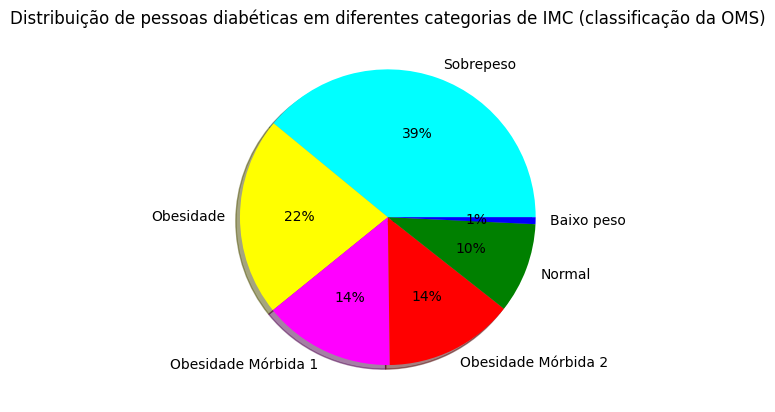

In [74]:
# Definindo a seleção de dados
contagem_diabeticos_faixa_imc = df_diabetico['faixa_imc'].value_counts()

# Definindo as cores do gráfico
cores_diabeticos_faixa_imc = {'Baixo peso': 'blue', 'Normal': 'green', 'Sobrepeso': 'cyan', 'Obesidade': 'yellow', 'Obesidade Mórbida 1': 'magenta', 'Obesidade Mórbida 2': 'red'}

# Criando o gráfico
plt.pie(contagem_diabeticos_faixa_imc.values, labels=contagem_diabeticos_faixa_imc.index, colors=[cores_diabeticos_faixa_imc[x] for x in contagem_diabeticos_faixa_imc.index], autopct='%1.f%%', shadow= True)

# Definindo título do gráfico
plt.title('Distribuição de pessoas diabéticas em diferentes categorias de IMC (classificação da OMS)')

# Exibindo o gráfico
plt.show()

Gráfico de distribuição de pessoas diabéticas em diferentes categorias de glicemia:

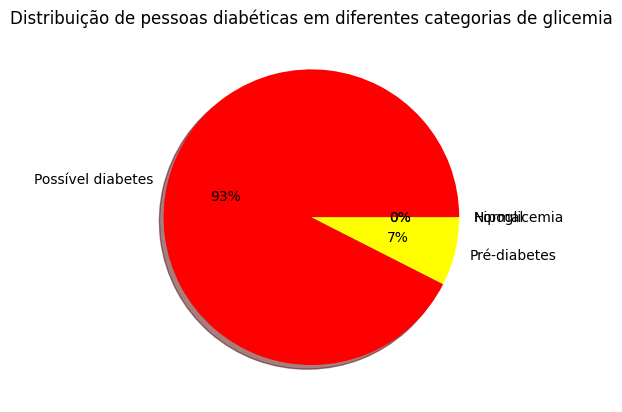

In [75]:
# Definindo a seleção de dados
contagem_diabeticos_glicemia = df_diabetico['faixa_glicemia'].value_counts()

# Definindo as cores do gráfico
cores_diabeticos_glicemia = {'Hipoglicemia': 'blue', 'Normal': 'green', 'Pré-diabetes': 'yellow', 'Possível diabetes': 'red'}

# Criando o gráfico
plt.pie(contagem_diabeticos_glicemia.values, labels=contagem_diabeticos_glicemia.index, colors=[cores_diabeticos_glicemia[x] for x in contagem_diabeticos_glicemia.index], autopct='%1.f%%', shadow= True )

# Definindo título do gráfico
plt.title('Distribuição de pessoas diabéticas em diferentes categorias de glicemia')

# Exibindo o gráfico
plt.show()

Gráfico da distibuição de pessoas diabéticas entre os gêneros:

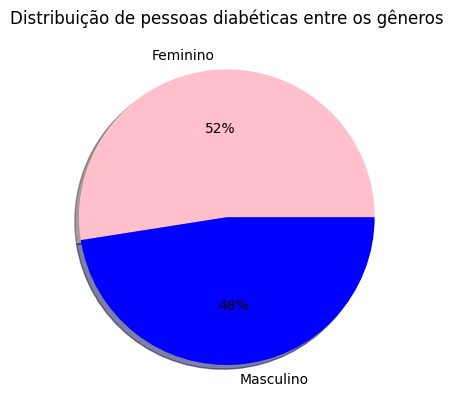

In [76]:
# Definindo a seleção de dados
contagem_diabeticos_genero = df_diabetico['genero'].value_counts()

# Definindo as cores do gráfico
cores_diabeticos_genero = {'Masculino': 'blue', 'Feminino': 'pink', 'other': 'green'}

# Criando o gráfico
plt.pie(contagem_diabeticos_genero.values, labels=contagem_diabeticos_genero.index, colors=[cores_diabeticos_genero[x] for x in contagem_diabeticos_genero.index], autopct='%1.f%%', shadow= True )

# Definindo título do gráfico
plt.title('Distribuição de pessoas diabéticas entre os gêneros')

# Exibindo o gráfico
plt.show()

Analisando os resultados dos gráficos acima, é conclusível que obesidade e elevada glicemia sanguínea sáo fatores de risco para o diagnóstico de diabetes na população, independente do gênero. Assim sendo, a base de dados analisada é conforme com os alertas da OMS em relação a estes dois fatores.